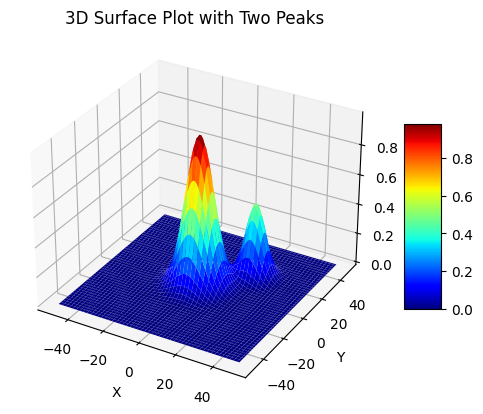

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データの生成
X = np.linspace(-50, 50, 100)
Y = np.linspace(-50, 50, 100)
X, Y = np.meshgrid(X, Y)

# 二つの異なる関数を重ねる例
Z1 = np.exp(-0.01 * (X**2 + Y**2))
Z2 = 0.5 * np.exp(-0.02 * ((X - 20)**2 + (Y - 20)**2))
Z = Z1 + Z2

# プロットの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# サーフェスプロット
surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none')

# カラーバーを追加
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# ラベルの追加
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# タイトルの追加
ax.set_title('3D Surface Plot with Two Peaks')

plt.show()


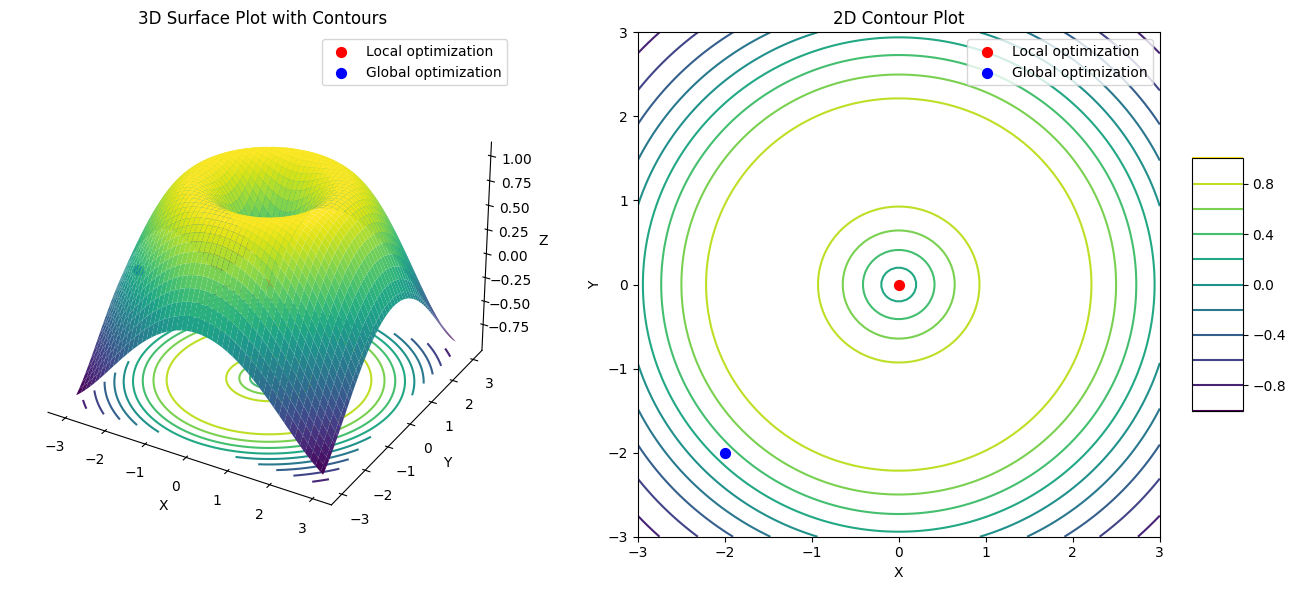

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データの生成
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# プロットの作成
fig = plt.figure(figsize=(14, 6))

# 3Dプロット
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
contour = ax1.contour(X, Y, Z, 10, cmap='viridis', linestyles="solid", offset=-1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Surface Plot with Contours')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.xaxis.pane.set_edgecolor('none')
ax1.yaxis.pane.set_edgecolor('none')
ax1.zaxis.pane.set_edgecolor('none')
ax1.grid(False)  # グリッドを消す
#fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# 2D等高線プロット
ax2 = fig.add_subplot(122)
contour2d = ax2.contour(X, Y, Z, 10, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('2D Contour Plot')
fig.colorbar(contour2d, ax=ax2, shrink=0.5, aspect=5)

# 最適化点のプロット（例）
local_opt = (0, 0, np.sin(0))  # ローカル最適化点（例）
global_opt = (-2, -2, np.sin(np.sqrt(8)))  # グローバル最適化点（例）

ax1.scatter(*local_opt, color='red', s=50, label='Local optimization')
ax1.scatter(*global_opt, color='blue', s=50, label='Global optimization')
ax1.legend()

ax2.scatter(local_opt[0], local_opt[1], color='red', s=50, label='Local optimization')
ax2.scatter(global_opt[0], global_opt[1], color='blue', s=50, label='Global optimization')
ax2.legend()

plt.tight_layout()
plt.show()

In [10]:
def geography():
    SUF = '.gl5'
    dtype = 'float32'
    #
    ay, bx = 2160, 4320
    gl5shape = (ay, bx)
    #
    # region
    left = 138
    right = 141
    bottom = 34
    top = 37
    #
    resolution = 12
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, img_extent
    
#-----------------------------------------------
# Draw city mask
#-----------------------------------------------
    
upperindex, lowerindex, leftindex, rightindex, img_extent = geography()
#
POP='gpw3'
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
pop_data = np.fromfile(f'{h08dir}/dat/cty_msk_/{POP}/city_{city_num:08d}.gl5', dtype='float32').reshape(2160, 4320)

# crop
mask_cropped = city_mask[upperindex:lowerindex, leftindex:rightindex]

# extent
projection = ccrs.PlateCarree()

# figure
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.add_feature(cfea.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=2)
ax.add_feature(cfea.LAKES.with_scale('50m'), edgecolor='#c7c783', zorder=1)
ax.gridlines(draw_labels=True)
im = ax.imshow(mask_cropped,
               origin='upper',
               extent=img_extent,
               transform=projection,
               cmap='gray_r')
fig.colorbar(im, ax=ax, orientation='horizontal')

NameError: name 'city_num' is not defined